In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Ronak\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv('Salary_Data.csv')

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Data Preprocessing

In [4]:
data.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

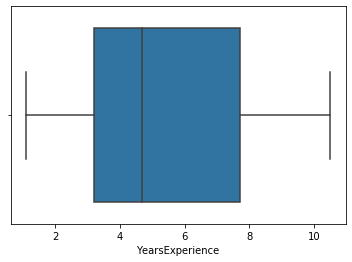

In [5]:
sns.boxplot(data.YearsExperience)

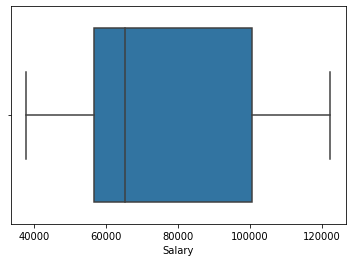

In [6]:
sns.boxplot(data.Salary)

In [7]:
x=data.iloc[:,0:1]

In [8]:
x=x.values

In [9]:
y=data.iloc[:,1:2]

In [10]:
y=y.values

In [11]:
x,y

(array([[ 1.1],
        [ 1.3],
        [ 1.5],
        [ 2. ],
        [ 2.2],
        [ 2.9],
        [ 3. ],
        [ 3.2],
        [ 3.2],
        [ 3.7],
        [ 3.9],
        [ 4. ],
        [ 4. ],
        [ 4.1],
        [ 4.5],
        [ 4.9],
        [ 5.1],
        [ 5.3],
        [ 5.9],
        [ 6. ],
        [ 6.8],
        [ 7.1],
        [ 7.9],
        [ 8.2],
        [ 8.7],
        [ 9. ],
        [ 9.5],
        [ 9.6],
        [10.3],
        [10.5]]), array([[ 39343.],
        [ 46205.],
        [ 37731.],
        [ 43525.],
        [ 39891.],
        [ 56642.],
        [ 60150.],
        [ 54445.],
        [ 64445.],
        [ 57189.],
        [ 63218.],
        [ 55794.],
        [ 56957.],
        [ 57081.],
        [ 61111.],
        [ 67938.],
        [ 66029.],
        [ 83088.],
        [ 81363.],
        [ 93940.],
        [ 91738.],
        [ 98273.],
        [101302.],
        [113812.],
        [109431.],
        [105582.],
        [116969.],
      

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Analysis

Text(0, 0.5, 'SALARY')

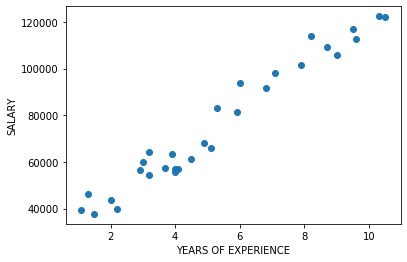

In [14]:
plt.scatter(x,y)
plt.xlabel("YEARS OF EXPERIENCE")
plt.ylabel("SALARY")

In [15]:
np.corrcoef(x.flatten(),y.flatten())

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

# Build linear regression model

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr=LinearRegression()#instance

In [18]:
lr.fit(x_train,y_train)#training step

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Test Model

In [19]:
y_pred=lr.predict(x_test)

In [20]:
y_pred

array([[111245.94139668],
       [ 60663.69641823],
       [ 62572.46037968],
       [ 75933.80810984],
       [ 63526.84236041],
       [ 53983.02255315]])

In [21]:
y_test

array([[105582.],
       [ 57189.],
       [ 63218.],
       [ 83088.],
       [ 56957.],
       [ 60150.]])

# Plotting best fit line

In [22]:
y_pred_train=lr.predict(x_train)

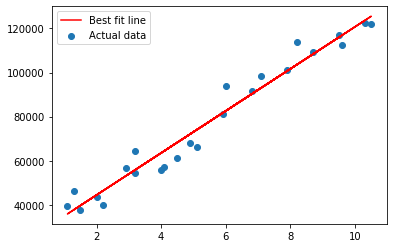

In [23]:
plt.scatter(x_train,y_train,label="Actual data")
plt.plot(x_train,y_pred_train,label="Best fit line",color="red")
plt.legend()

In [24]:
lr.intercept_

array([25351.56313139])

In [25]:
lr.coef_

array([[9543.81980725]])

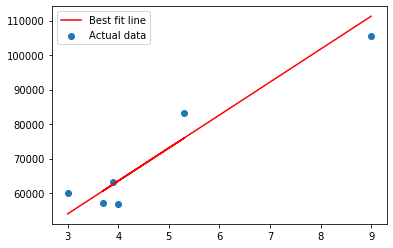

In [26]:
plt.scatter(x_test,y_test,label="Actual data")
plt.plot(x_test,y_pred,label="Best fit line",color="red")
plt.legend()

# Evaluate the model

In [27]:
from sklearn.metrics import mean_squared_error#rmse

In [28]:
np.sqrt(mean_squared_error(y_test,y_pred))

5430.582685388498

In [29]:
np.sqrt(mean_squared_error(y_train,y_pred_train))

5639.665118760792

In [30]:
from sklearn.metrics import r2_score#sumofresiduals

In [31]:
r2_score(y_train,y_pred_train)

0.9612543203100112

In [32]:
r2_score(y_test,y_pred)

0.9072729444973416

# Let's apply RIDGE regression

In [33]:
from sklearn.linear_model import Ridge,Lasso

In [34]:
ridge_model=Ridge(alpha=30)

In [35]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=30, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [36]:
y_pred_ri=ridge_model.predict(x_test)
y_pred_train_ri=ridge_model.predict(x_train)

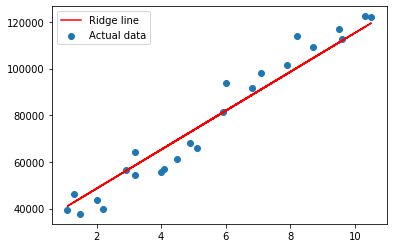

In [37]:
plt.scatter(x_train,y_train,label="Actual data")
plt.plot(x_train,y_pred_train_ri,label="Ridge line",color="red")
plt.legend()

In [38]:
r2_score(y_train,y_pred_train_ri),r2_score(y_test,y_pred_ri)

(0.9459704760983265, 0.9148397591915604)

# Lasso Model

In [39]:
lasso_model=Lasso(alpha=30)
lasso_model.fit(x_train,y_train)
y_pred_lm=lasso_model.predict(x_test)
y_pred_train_lm=lasso_model.predict(x_train)

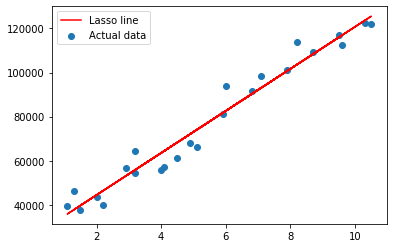

In [40]:
plt.scatter(x_train,y_train,label="Actual data")
plt.plot(x_train,y_pred_train_lm,label="Lasso line",color="red")
plt.legend()

In [41]:
r2_score(y_train,y_pred_train_lm),r2_score(y_test,y_pred_lm)

(0.961254193754236, 0.907351555377213)

# Compare

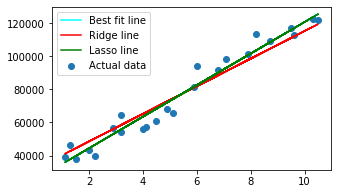

In [42]:
plt.figure(figsize=(5,3))
plt.scatter(x_train,y_train,label="Actual data")
plt.plot(x_train,y_pred_train,label="Best fit line",color="cyan")
plt.plot(x_train,y_pred_train_ri,label="Ridge line",color="red")
plt.plot(x_train,y_pred_train_lm,label="Lasso line",color="green")
plt.legend()